In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Identify missing values.
#Estimate Skewness and Kurtosis.
#Correlation Heat Map.
#Scatter plot for different parameters.
#Replace categorical values with numerical values (i.e., America 1, Europe 2 etc.).

In [16]:
folder_path = '/content/drive/MyDrive/auto-mpg.csv'

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
df = pd.read_csv(folder_path)

In [19]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [20]:
df. describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Identifying missing values


In [24]:
df.isnull().sum()

#no missing values

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Skewness and Kurtosis

In [25]:
# Calculate skewness for each numeric column
skewness = df.skew()
print("Skewness:\n", skewness)

# Calculate kurtosis for each numeric column
kurtosis = df.kurtosis()
print("Kurtosis:\n", kurtosis)

Skewness:
 mpg             0.457066
cylinders       0.526922
displacement    0.719645
weight          0.531063
acceleration    0.278777
model year      0.011535
origin          0.923776
dtype: float64
Kurtosis:
 mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
weight         -0.785529
acceleration    0.419497
model year     -1.181232
origin         -0.817597
dtype: float64


<ipython-input-25-f030abe2cf3c>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
<ipython-input-25-f030abe2cf3c>:6: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurtosis()


## Correlation Heatmamp

<ipython-input-30-8324af209901>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


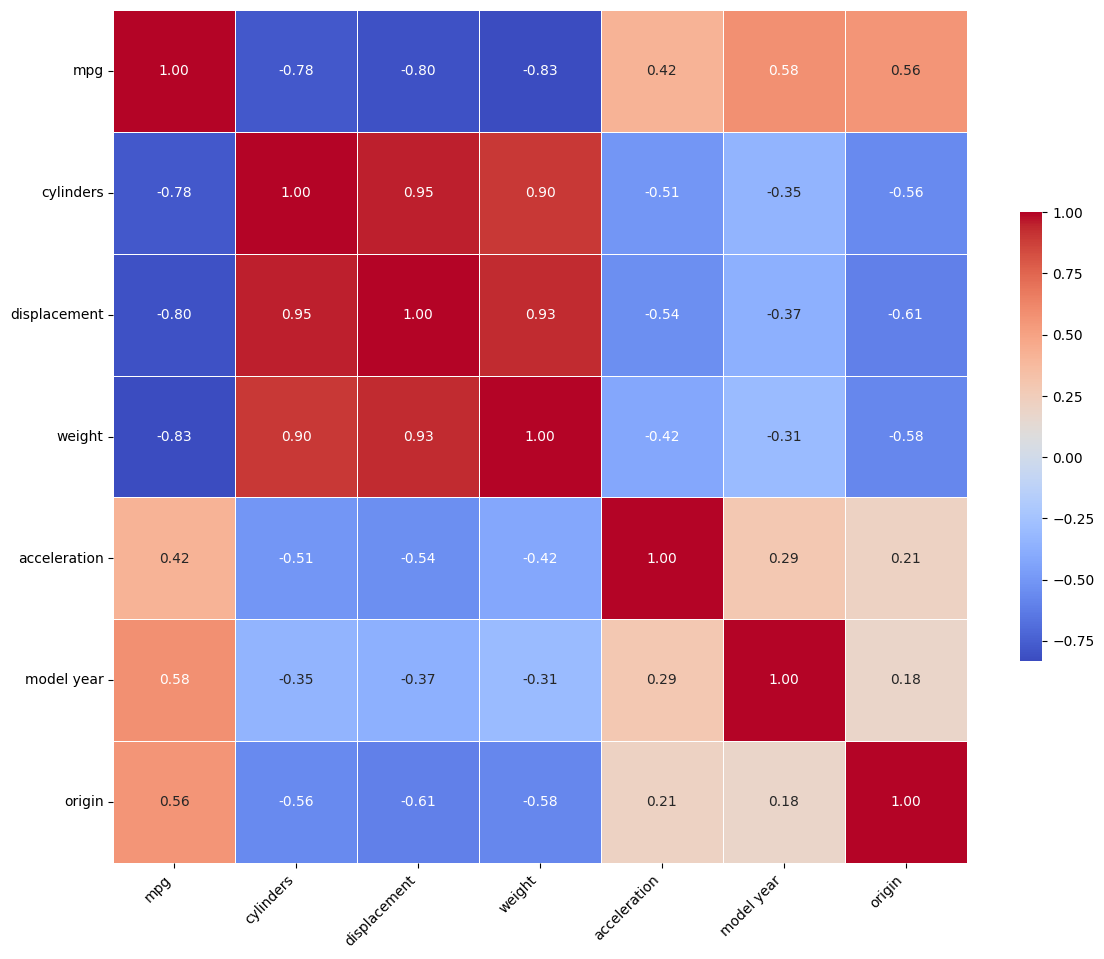

In [30]:
#Calculate the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
# You may need to adjust the figure size to fit your particular screen resolution and DataFrame size
plt.figure(figsize=(12, 10))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')  # ha is the horizontal alignment

# Rotate y-axis labels
plt.yticks(rotation=0)  # Adjust as needed

# Adjust subplot params to give some padding
plt.tight_layout()

# Show the plot
plt.show()

## Scatterplots

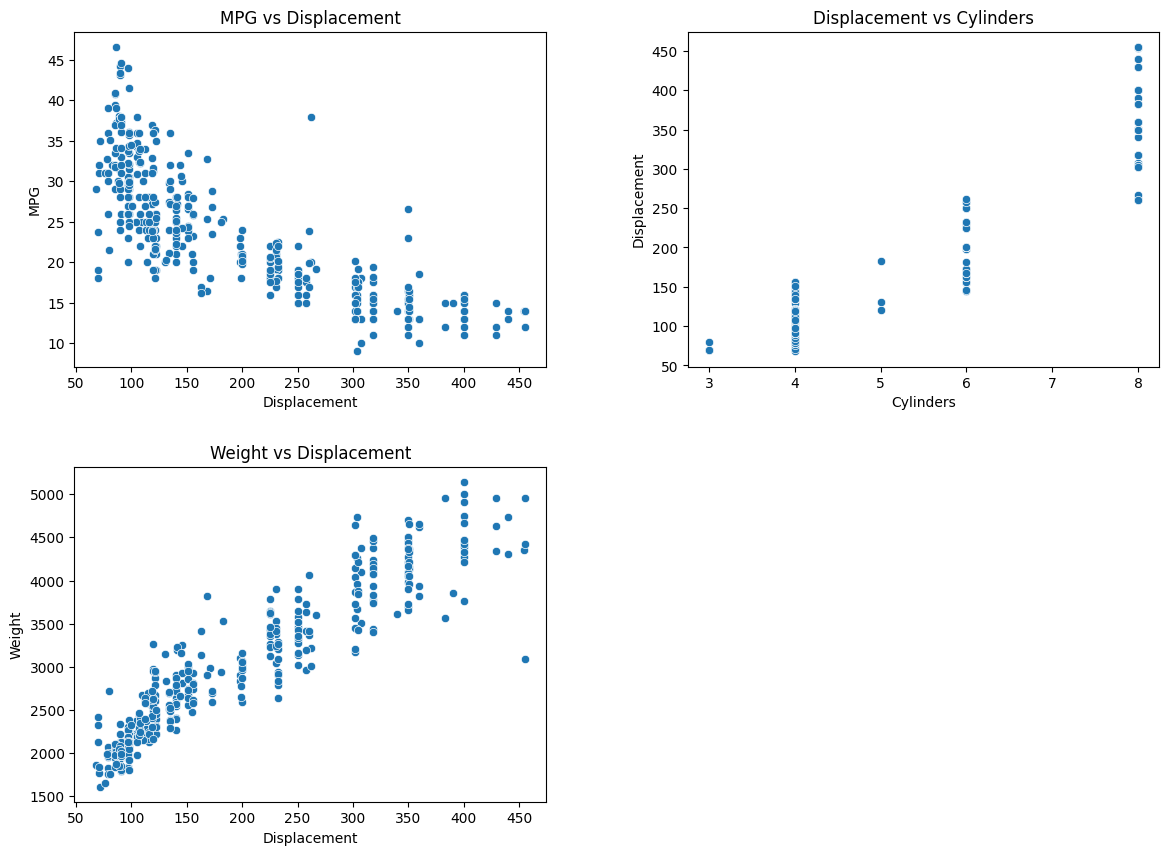

In [34]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
plt.subplots_adjust(hspace=0.3, wspace=0.3) # Adjust horizontal and vertical spaces

# First scatter plot: mpg x displacement
sns.scatterplot(ax=axes[0, 0], data=df, x='displacement', y='mpg')
axes[0, 0].set_title('MPG vs Displacement')
axes[0, 0].set_xlabel('Displacement')
axes[0, 0].set_ylabel('MPG')

# Second scatter plot: displacement x cylinders
sns.scatterplot(ax=axes[0, 1], data=df, x='cylinders', y='displacement')
axes[0, 1].set_title('Displacement vs Cylinders')
axes[0, 1].set_xlabel('Cylinders')
axes[0, 1].set_ylabel('Displacement')

# Third scatter plot: weight x displacement
sns.scatterplot(ax=axes[1, 0], data=df, x='displacement', y='weight')
axes[1, 0].set_title('Weight vs Displacement')
axes[1, 0].set_xlabel('Displacement')
axes[1, 0].set_ylabel('Weight')

# The fourth subplot is empty, we can hide it or leave it as is.
axes[1, 1].axis('off')  # This will hide the bottom right subplot

# Show the plot
plt.show()





## Turn categorical names into numerical


In [35]:

# Convert the column to numeric, coercing any non-numeric values to NaN
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()
df['car_name_encoded'] = le.fit_transform(df['car name'])

In [38]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,car_name_encoded
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,49
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,36
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,231
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,14
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,161
